                                Simplilearn Youtube video
Keras Tutorial For Beginners | Keras For Deep Learning | Deep Learning Tutorial | Simplilearn

https://www.youtube.com/watch?v=pWp3PhYI-OU&t=2600s

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

Example Data

Experimental drug was tested on 2100 individuals between 13 to 100 years of age. Half the participants are under 65. Around 95% of participants under 65 experienced no side effects. 95% of a participants over 65 experienced side effects.

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)


In [4]:
print(len(train_samples), train_samples[:5])
print(len(train_labels), train_labels[:5])

2100 [62, 92, 53, 85, 59]
2100 [1, 0, 1, 0, 1]


In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
scaled_train_samples[:5]

array([[0.77011494],
       [0.24137931],
       [0.13793103],
       [0.7816092 ],
       [0.7816092 ]])

Creating an Artificial Neural Network

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [8]:
model = Sequential([Dense(units=16, input_shape=(1,), activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax'),])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


Training the model

In [10]:
# the key here is learning_rate. Generally 0.0001 

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# can play around with the batch_size to see what fits the model best. In this case, we're using 10
# can play around with the epochs to see what fits the model best. In this case, we're using 30

model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, shuffle=True, epochs=30, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 - 1s - loss: 0.7079 - accuracy: 0.4926 - val_loss: 0.6984 - val_accuracy: 0.2333
Epoch 2/30
1890/1890 - 0s - loss: 0.6857 - accuracy: 0.5995 - val_loss: 0.6665 - val_accuracy: 0.7810
Epoch 3/30
1890/1890 - 0s - loss: 0.6608 - accuracy: 0.6746 - val_loss: 0.6362 - val_accuracy: 0.7952
Epoch 4/30
1890/1890 - 0s - loss: 0.6348 - accuracy: 0.7328 - val_loss: 0.6042 - val_accuracy: 0.8095
Epoch 5/30
1890/1890 - 0s - loss: 0.6086 - accuracy: 0.7619 - val_loss: 0.5760 - val_accuracy: 0.8286
Epoch 6/30
1890/1890 - 0s - loss: 0.5835 - accuracy: 0.7862 - val_loss: 0.5503 - val_accuracy: 0.8571
Epoch 7/30
1890/1890 - 0s - loss: 0.5593 - accuracy: 0.8138 - val_loss: 0.5241 - val_accuracy: 0.8619
Epoch 8/30
1890/1890 - 0s - loss: 0.5344 - accuracy: 0.8302 - val_loss: 0.4980 - val_accuracy: 0.8762
Epoch 9/30
1890/1890 - 0s - loss: 0.5089 - accuracy: 0.8519 - val_loss: 0.4725 - val_accuracy: 0.8905
Epoch 10/30
1890/1890 - 0s - loss: 

Building a test set and predicting

In [12]:
test_labels = []
test_samples = []

In [13]:
for i in range(10):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)
    
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.transform(test_samples.reshape(-1,1))
scaled_test_samples[:5]

array([[0.73563218],
       [0.83908046],
       [0.54022989],
       [0.02298851],
       [0.45977011]])

In [14]:
predictions = model.predict(x=scaled_test_samples,
                            batch_size=10,
                            verbose=0)

In [15]:
print(predictions[:5])

[[0.16346201 0.83653796]
 [0.07139731 0.92860264]
 [0.5784386  0.4215614 ]
 [0.964636   0.03536397]
 [0.7537884  0.24621166]]


In [16]:
# rounding up predictions to get 0 or 1
rounded_predictions = np.argmax(predictions, axis=-1)
rounded_predictions[:5]

array([1, 1, 0, 0, 0], dtype=int64)

<h2> Confusion Matrices for accuracy check <h2>

In [17]:
# above line done in markdown like so: <h2> Confusion Matrices for accuracy check <h2>

In [18]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [19]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') /cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
        
    print(cm)
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']

Confusion matrix without normalization
[[192  18]
 [  9 201]]


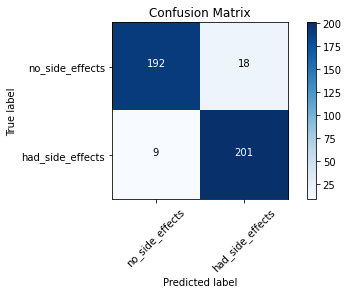

In [22]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')